In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\users\sappusamy\appdata\local\continuum\anaconda3\envs\sri\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
c:\users\sappusamy\appdata\local\continuum\anaconda3\envs\sri\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
c:\users\sappusamy\appdata\local\continuum\anaconda3\envs\sri\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
x = np.array([i for i in range(1,501,2)])
y = np.array([i*2 for i in range(1,501,2)])

In [3]:
X = pd.read_csv('train.csv')

In [4]:
X.shape

(700, 2)

In [5]:
X = X.dropna()

In [6]:
X.shape

(699, 2)

In [7]:
x = X['x'].to_numpy()
y = X['y'].to_numpy()

In [8]:
n = len(x)
n

699

In [250]:
bs = 128
iterations = n//bs+1
iterations

6

In [251]:
def mse(m,n):
    return ((m-n)**2).mean()

In [252]:
def grad_p0(pred,actual):
    p0_grad = (pred-actual).mean()
    return p0_grad

In [253]:
def grad_p1(pred,actual,inp):
    p1_grad = ((pred-actual)*inp).mean()
    return p1_grad

In [299]:
lr=1e-4

In [300]:
p0=0
p1=1

In [296]:
lrs = [1e-3,1e-3,1e-4,1e-4,1e-4]

In [301]:
for i in range(5):
    for itr in range(0,n,bs):
        preds = p0 + p1*x[itr:itr+bs]
        loss = mse(preds,y[itr:itr+bs])
        print(loss)
    #     print(grad_p0(preds,y[itr:itr+bs]))
        p0 = p0-lr*grad_p0(preds,y[itr:itr+bs])
        p1 = p1-lr*grad_p1(preds,y[itr:itr+bs],x[itr:itr+bs])
#         print(grad_p0(preds,y[itr:itr+bs]))

7.943002656238626
7.746798170911346
7.671783319529953
8.022925418447667
7.611620658459008
9.085614901356886
7.928558766757574
7.719590963507784
7.653192913703755
8.042191035263372
7.654193002819651
9.050651384480629
7.928933120786382
7.718579774871115
7.652183461063773
8.043957943593355
7.657761472080182
9.04783540896611
7.928974331337861
7.718504785918386
7.6521040331874985
8.044103943361147
7.658054042881433
9.047605630290208
7.928977925216744
7.718498325304147
7.652097308793385
8.044116027462216
7.6580779609235075
9.047587199752277


In [302]:
print('p0',p0)
print('p1',p1)

p0 -4.796795533375943e-05
p1 0.99713601895421


In [303]:
X_test = pd.read_csv('test.csv')

In [304]:
X_test.shape

(300, 2)

In [305]:
X_test = X_test.dropna()

In [306]:
X_test.shape

(300, 2)

In [307]:
test_x = X_test['x']
test_y = X_test['y']

In [308]:
# test_x = np.array([i for i in range(501,520,2)])
# test_y = np.array([i*2 for i in range(501,520,2)])

In [309]:
predictions = []
for i in test_x:
    predictions.append(p0+p1*i)

In [310]:
test_x[:3]

0    77
1    21
2    22
Name: x, dtype: int64

In [311]:
test_y[:3]

0    79.775152
1    23.177279
2    25.609262
Name: y, dtype: float64

In [312]:
predictions[:3]

[76.77942549151884, 20.939808430083076, 21.936944449037288]

In [313]:
predictions = np.array(predictions)

In [314]:
mse(predictions,test_y)

9.575492585622744

In [315]:
np.sqrt(mse(predictions,test_y))

3.094429282698628

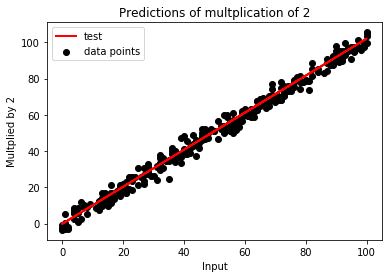

In [290]:

plt.scatter(test_x,test_y,color='k',label='data points')
plt.plot(test_x,predictions,'r',label='test',linewidth=2)

plt.title('Predictions of multplication of 2')
plt.xlabel('Input')
plt.ylabel('Multplied by 2')

plt.legend()

plt.grid(False)

plt.show()